## **2.2.1 텐서 다루기**

In [31]:
pip uninstall torch

^C
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 --index-url https://download.pytorch.org/whl/cu124

^C
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cu124


In [85]:
import torch
torch.cuda.is_available()

False

In [89]:
import torch
print(torch.tensor([[1,2],[3,4]])) # 2차원 형태 텐서
#print(torch.tensor([[1,2],[3,4]],device='cuda:0')) # GPU에 텐서 생성
# device의 디폴트 값은 cpu에 텐서 생성
# 대규모 연산을 다룰 때는 gpu를 활용해야 함
print(torch.tensor([[1,2],[3,4]],dtype=torch.float64))  #dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [90]:
import torch
print(torch.cuda.is_available())  # True여야 GPU 사용 가능

False


In [91]:
# 텐서를 ndarray 로 변환
temp=torch.tensor([[1,2],[3,4]])
print(temp.numpy())
# gpu상의 tensor를 cpu의 텐서로 변환 후 ndarrya로 변환
#temp=torch.tensor([[1,2],[3,4]], device='cuda:0')
print(temp.to('cpu').numpy())

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [92]:
# 텐서의 인덱스 조작
temp=torch.FloatTensor([1,2,3,4,5,6,7])
print(temp[0],temp[1],temp[-1]) # 인덱스로 접근
print(temp[2:5],temp[4:-1]) # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
tensor([3., 4., 5.]) tensor([5., 6.])


In [93]:
# gpu로 더 빠르게 연산이 가능
# 텐서간의 타입이 다르면 연산이 불가능
# floattensor(32비트의 부동 소수점)과 doubletensor(64비트 부동 소수점) 사칙 연산 경우 오류 발생
v=torch.tensor([1,2,3])
w=torch.tensor([3,4,5])
print(v-w) # 길이가 같은 벡터간 뺄셈 연산
m=torch.tensor([9])
print(v-m) # 길이가 다른 벡터간 뺄센 연산

tensor([-2, -2, -2])
tensor([-8, -7, -6])


In [94]:
# 텐서의 차원 변경
# reshape과 유사한 함수인 view 또는 다른 길이의 텐서를 하나로 병합하는 cat
temp=torch.tensor([[1,2],[3,4]])
print(temp.shape)
print(temp.view(4,1)) # 4x1 로 변형
print(temp.view(-1)) # 1차원 벡터로 변형
print(temp.view(1,-1)) # 1x4 로 변형
print(temp.view(-1,1)) # 4x1 로 변형

torch.Size([2, 2])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


In [99]:
# 데이터 준비
import pandas as pd
#data=pd.read_csv()
# csv x 칼럼의 값을 넘파이 배열로 받아 tensor dtype으로 바꾸어줌
#x=torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
#y=torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

In [100]:
# 데이터를 한번에 메모리에 불러와서 훈련시키면 시간과 비용 측면에서 효율적이지 않음
# 데이터를 한번에 다 부르지 않고 조금씩 나누어 불러서 사용하는 방식: 커스텀 데이터셋
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self,csv_file): # 필요 변수 선언, 데이터 전처리 해주는 함수
        self.label=pd.read_csv(csv_file)
    def __len__(self): # 데이터셋 길이 가져오는 함수
        return len(self.label)
    def __getitem__(self,index): # 데이터셋에서 특정 데이터 가져오는 함수
        sample=torch.tensor(self.label.iloc[idx,0:3]).int()
        label=torch.tensor(self.label.iloc[idx,3]).int()
        return sample,label

In [102]:
#tensor_dataset=CustomDataset('')
#dataset=DataLoader(tensor_dataset,batch_size=4,shuffle=True)
# 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기만큼 데이터를 꺼내서 사용


In [33]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [107]:
! pip uninstall torch torchvision
! pip install torch torchvision

^C


In [109]:
# 파이토치에서 제공하는 데이터셋 사용
''''
import torchvision.transforms as transforms
mnist_transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(1.0),)
    # 평균이 0.5, 표준편차가 1이 되도록 데이터의 분포 정규분포로 조정
])
from torchvision.datasets import MNIST
import requests
download_root="C:/Users/sshyu/OneDrive/바탕 화면/Euron/chap02/data/MNIST_DATASET"
train_dataset=MNIST(downloead_root, transform=mnist_transform, train=True,
                   download=True)
valid_dataset=MNIST(downloead_root, transform=mnist_transform, train=False,
                   download=True) # 검증 데이터셋
test_dataset=MNIST(downloead_root, transform=mnist_transform, train=False,
                   download=True) # 테스트 데이터셋
                   '''

'\'\nimport torchvision.transforms as transforms\nmnist_transform=transforms.Compose([\n    transforms.ToTensor(),\n    transforms.Normalize((0.5),(1.0),)\n    # 평균이 0.5, 표준편차가 1이 되도록 데이터의 분포 정규분포로 조정\n])\nfrom torchvision.datasets import MNIST\nimport requests\ndownload_root="C:/Users/sshyu/OneDrive/바탕 화면/Euron/chap02/data/MNIST_DATASET"\ntrain_dataset=MNIST(downloead_root, transform=mnist_transform, train=True,\n                   download=True)\nvalid_dataset=MNIST(downloead_root, transform=mnist_transform, train=False,\n                   download=True) # 검증 데이터셋\ntest_dataset=MNIST(downloead_root, transform=mnist_transform, train=False,\n                   download=True) # 테스트 데이터셋\n                   '

In [111]:
# 모델 정의
# 계층: 모듈, 또는 모듈을 구성하는 한개의 계층으로 CNN layer, Linear layer 등이 있음
# 모듈: 한개 이상의 계층이 모여서 구성된 것으로 모듈이 모여 새로운 모듈을 만들 수 있음
# 모델: 최종적으로 원하는 네트워크로 한개의 모듈이 모델이 될 수 잇음
import torch.nn as nn
## 단순 신경망을 정의하는 방법
model=nn.Linear(in_features=1,out_features=1,bias=True)

## nn.Module() 을 정의하는 방법
class MLP(nn.Module):
    def __init__(self,inputs):
        super(MLP,self).__init__()
        self.layer=Linear(inputs,1) # 계층 정의
        self.activation=Sigmoid() # 활성화함수 정의
    def forward(self,X):
        X=self.layer(X)
        X=self.activation(X)
        return X

In [125]:
## Sequential 신경망을 정의하는 방법
class MLP(nn.Module):
    def __init__(self,inputs):
        super(MLP,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=30,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer3=nn.Sequential(
            nn.Linear(in_features_30*5*5,out_features=10,bias=True),
            nn.ReLU(inplace=True)
        )
        
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=x.view(x.shape[0],-1)
        x=self.layer3(x)
        return X

In [127]:
#model=MLP()
print(list(model.children()))
print(list(model.modules()))
## nn.Sequential 모델의 계층이 복잡할 수록 효과가 뛰어남

[]
[Linear(in_features=1, out_features=1, bias=True)]


In [120]:
# 함수로 신경망을 정의하는 방법
# Sequential을 이용하는 것과 동일하지만 함수로 선언할 경우 변수에 저장해놓은
# 계층들을 재사용 할 수 있는 장점이 있음
# 하지만 모델이 복잡해지는 단점도 있음
def MLP(in_features=1,hidden_features=20,out_fetures=1):
    hidden=nn.Linear(in_features=in_features, out_features=hidden_features,
                    bias=True)
    activation=nn.ReLU()
    output=nn.Linear(in_features=hidden_features, out_features=out_features,
                    bias=True)
    net=nn.Sequential(hidden,activation,output)
    return net

In [128]:
# 모델의 파라미터 정의
## 손실함수: 학습되는 동안 출력과 실제 값 사이의 오차를 측정
## 예시) BCELoss(이진 분류), CrossEntropyLoss(다중 분류), MSELoss(회귀 모델)
## 옵티마이저: 손실함수를 바탕으로 모델의 업데이트 방법을 결정
## optimizer.step() 매서드를 통해 전달받은 파라미터를 업그레이드
## torch.optim.Optimizer(params, defaults) 는 모든 옵티마이저의 기본이 되는 클래스
## zero_grad() 매서드는 옵티마이저에 사용된 파라미터의 기울기를 0으로 만듦
## torch.optim.lr_scheduler 는 에포크에 따라 학습률 조절
# learning rate scheduler: 미리 지정한 횟수의 에포크를 지날 때마다 학습률을 감소
# 학습 초기에는 빠른 학습을 진행하나 global minimum 근처에 다다르면
# 학습률을 줄여서 최적점을 찾아갈 수 있도록 해줌
# optim.lr_scheduler.LambdaR: 람다 함수를 이용하여 그 함수의 결과를 학습률로 설정
# optim.lr_scheduler.MultiStepLR: 특정 단계가 아닌 지정된 에포크에서만 감마비율로 감소시킴
# optim.lr_scheduler.Exponential:R: 에포크마다 이전 학습률에 감마만큼 곱함
# optim.lr_scheduler.CosineAnnealingLR: 학습률을 코사인 함수의 형태처럼 변화
# optim.lr_scheduler.ReduceLROnPlateau: 학습률이 잘 되고 있는지 아닌지에 따라 동적으로 학습률을 변화시킴
# metrics: 훈련과 테스트 단계를 모니터링

# 모델의 파라미터를 정의하는 예시코드
'''
from torch.optim import optimizer
criterion=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
scheduler=torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                          lr_lambda=lambda epoch: 0.95**epoch)
for epoch in range(1,100+1):
    for x,y in dataloader:
        optimizer.zero_grad()
loss_fn(model(x),y).backward()
optimizer.step()
scheduler.step()
'''

'\nfrom torch.optim import optimizer\ncriterion=torch.nn.MSELoss()\noptimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)\nscheduler=torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,\n                                          lr_lambda=lambda epoch: 0.95**epoch)\nfor epoch in range(1,100+1):\n    for x,y in dataloader:\n        optimizer.zero_grad()\nloss_fn(model(x),y).backward()\noptimizer.step()\nscheduler.step()\n'

**모델 학습**
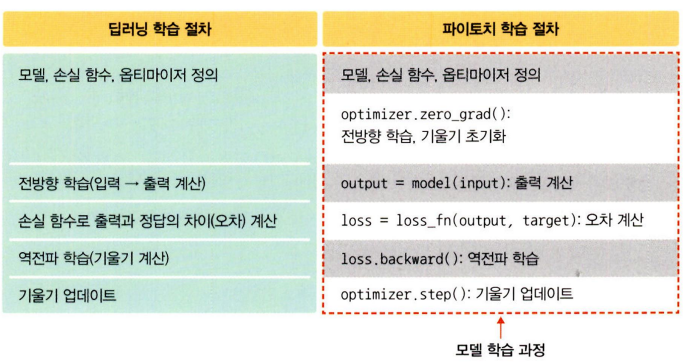


In [130]:
# 모델 평가 예시코드
'''
preds=torch.randn(10,5).softmax(dim=-1)
target=torch.randint(5,(10,))
acc=torchmetrics.functional.accuracy(preds, target)

import torchmetrics
metric=torch.metrics.Accuracy() # 모델 평가 초기화
n_batches=10
for i in range(n_batches):
    preds=torch.randn(10,5).softmax(dim=-1)
    target=torch.randint(5,(10,))
    acc=metric(preds,target)
    print(f'Accuracy on Batch {i}:{acc}') # 현재 배치에서 모델 평가
acc=metric.compute()
print(f'Accuracy on All Data: {acc}') # 모든 배치에서 모델 평가
'''

"\npreds=torch.randn(10,5).softmax(dim=-1)\ntarget=torch.randint(5,(10,))\nacc=torchmetrics.functional.accuracy(preds, target)\n\nimport torchmetrics\nmetric=torch.metrics.Accuracy() # 모델 평가 초기화\nn_batches=10\nfor i in range(n_batches):\n    preds=torch.randn(10,5).softmax(dim=-1)\n    target=torch.randint(5,(10,))\n    acc=metric(preds,target)\n    print(f'Accuracy on Batch {i}:{acc}') # 현재 배치에서 모델 평가\nacc=metric.compute()\nprint(f'Accuracy on All Data: {acc}') # 모든 배치에서 모델 평가\n"

In [132]:
# 훈련 과정 업그레이드
! pip install tensorboard

   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.5 MB 4.8 MB/s eta 0:00:01
   ------------- -------------------------- 1.8/5.5 MB 4.8 MB/s eta 0:00:01
   ------------------- -------------------- 2.6/5.5 MB 4.7 MB/s eta 0:00:01
   -------------------------- ------------- 3.7/5.5 MB 4.5 MB/s eta 0:00:01
   ---------------------------------- ----- 4.7/5.5 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.3 MB 4.8 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.3 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 2.9/4.3 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 3.9/4.3 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 4.3/4.3 MB 4.6 MB/s eta 0:00:00


In [134]:
! pip install utils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13936 sha256=56bf7318c8d61ac8e793e1348da79fbc693ace3999df109ecb8bea4049d6f0af
  Stored in directory: c:\users\sshyu\appdata\local\pip\cache\wheels\b6\a1\81\1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [138]:
# 훈련 과정 모니터링 예시코드
'''
from torch.utils.tensorboard import SummaryWriter
num_epochs=100
writer=SummaryWriter("C:/Users/sshyu/OneDrive/바탕 화면/Euron/chap02/tensorboard") # 모니터링에 필요한 값들이 저장될 위치
for epoch in range(num_epochs):
    model.train() # 학습 모드로 전환
    batch_loss=0.0
    for i, (x,y) in enumerate(dataloader):
        x,y=x.to(device).float(), y.to(device).float()
        outputs=model(x)
        loss=criterion(outputs,y)
        writer.add_scala('LOSS',loss,epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
writer.close() 
'''

'\nfrom torch.utils.tensorboard import SummaryWriter\nnum_epochs=100\nwriter=SummaryWriter("C:/Users/sshyu/OneDrive/바탕 화면/Euron/chap02/tensorboard") # 모니터링에 필요한 값들이 저장될 위치\nfor epoch in range(num_epochs):\n    model.train() # 학습 모드로 전환\n    batch_loss=0.0\n    for i, (x,y) in enumerate(dataloader):\n        x,y=x.to(device).float(), y.to(device).float()\n        outputs=model(x)\n        loss=criterion(outputs,y)\n        writer.add_scala(\'LOSS\',loss,epoch)\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\nwriter.close() \n'

In [139]:
## 파이토치 코드 맛보기
# 데이터셋 호출
import pandas as pd
dataset=pd.read_csv("C:/Users/sshyu/OneDrive/바탕 화면/Euron/chap02/data/car_evaluation.csv")
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

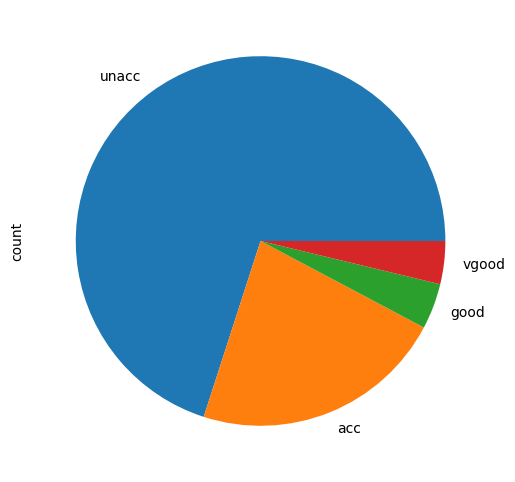

In [140]:
# 데이터셋 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_size=plt.rcParams['figure.figsize']
fig_size[0]=8
fig_size[1]=6
plt.rcParams['figure.figsize']=fig_size
dataset.output.value_counts().plot(kind='pie')
# 양호한 상태의 자동차 비율이 매우 낮은 것을 확인
# 데이터 전처리 - 단어를 모두 숫자로 변환해야 함

In [141]:
dataset.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [142]:
categorical_col=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
for category in categorical_col:
    # astype 매서드를 활용하여 데이터를 범주형으로 전환
    dataset[category]=dataset[category].astype('category')
price=dataset['price'].cat.codes.values
maint=dataset['maint'].cat.codes.values
doors=dataset['doors'].cat.codes.values
persons=dataset['persons'].cat.codes.values
lug_capacity=dataset['lug_capacity'].cat.codes.values
safety=dataset['safety'].cat.codes.values
import numpy as np
categorical_data=np.stack([price,maint, doors, persons, lug_capacity, safety],1)
categorical_data[:10] # 열개의 행 출력해보기
# 범주형 데이터 -> 넘파이 배열 -> 텐서 순서

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [143]:
categorical_data=torch.tensor(categorical_data,dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [144]:
# output인 label 도 텐서로 변환해주기
outputs=pd.get_dummies(dataset.output)
outputs=outputs.values
outputs=torch.tensor(outputs).flatten() # 1차원 텐서로 변환
print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [145]:
# 범주형 칼럼을 N 차원으로 변환
categorical_column_size=[len(dataset[column].cat.categories) for column in categorical_col]
categorical_embedding_size=[(col_size,min(50,(col_size+1)//2)) for col_size in  categorical_column_size]
print(categorical_embedding_size)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [146]:
# 데이터셋 분리
total_records=1728
test_records=int(total_records*0.2) # 전체 데이터의 20%를 테스트로 사용
categorical_train_data=categorical_data[:total_records-test_records]
categorical_test_data=categorical_data[total_records-test_records:total_records]
train_outputs=outputs[:total_records-test_records]
test_outputs=outputs[total_records-test_records:total_records]

In [147]:
# 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [148]:
# 모델 네트위크 생성
import torch.nn as nn
class Model(nn.Module):
    def __init__(self,embedding_size,output_size,layers,p=0.4):
        # 모델에서 사용될 파라미터와 신경망 초기화
        # Model class 에 접근할 때 사용
        super().__init__()
        self.all_embeddings=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embedding_size])
        self.embedding_dropout=nn.Dropout(p)
        all_layers=[]
        num_categorical_cols=sum((nf for ni,nf in embedding_size))
        input_size=num_categorical_cols
        for i in layers:
            all_layers.append(nn.Linear(input_size,i))
            # 활성화 함수로 이용
            all_layers.append(nn.ReLU(inplace=True))
            # 배치 정규화 용도로 사용
            all_layers.append(nn.BatchNorm1d(i))
            # 과적합 방지에 사용
            all_layers.append(nn.Dropout(p))
            input_size=i
        all_layers.append(nn.Linear(layers[-1],output_size))
        self.layers=nn.Sequential(*all_layers)
    def forward(self,x_categorical):
        embeddings=[]
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x=torch.cat(embeddings,1)
        x=self.embedding_dropout(x)
        x=self.layers(x)
        return x
            

In [149]:
model=Model(categorical_embedding_size,4,[200,100,50])
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [150]:
# 모델 파리미터 정의
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [151]:
if torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device=torch.device('cpu')

In [152]:
# 모델 학습
epochs=500
aggregated_loss=[]
train_outputs=train_outputs.to(device=device,dtype=torch.int64)
for i in range(epochs):
    i+=1
    y_pred=model(categorical_train_data).to(device)
    single_loss=loss_function(y_pred,train_outputs)
    aggregated_loss.append(single_loss) # 반복할 때마다 오차를 리스트에 추가
    if i%25==1:
        print(f'epoch:{i:3}loss:{single_loss.item():10.8f}')
    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()
print(f'epoch:{i:3} loss:{single_loss.item():10.8f}') # 오차가 25에포크 마다 출력

epoch:  1loss:1.56311202
epoch: 26loss:1.39406645
epoch: 51loss:1.29450786
epoch: 76loss:1.20805740
epoch:101loss:1.07637382
epoch:126loss:0.97431397
epoch:151loss:0.83711559
epoch:176loss:0.74714434
epoch:201loss:0.70550275
epoch:226loss:0.68299127
epoch:251loss:0.63653308
epoch:276loss:0.62525517
epoch:301loss:0.59929758
epoch:326loss:0.60200703
epoch:351loss:0.59305185
epoch:376loss:0.59354752
epoch:401loss:0.58285236
epoch:426loss:0.58091545
epoch:451loss:0.57735956
epoch:476loss:0.57663000
epoch:500 loss:0.57646132


In [153]:
# 테스트 데이터셋으로 모델 예측
test_outputs=test_outputs.to(device=device,dtype=torch.int64)
with torch.no_grad():
    y_val=model(categorical_test_data)
    loss=loss_function(y_val,test_outputs)
print(f'LOSS:{loss:.8f}')

LOSS:0.56207788


In [154]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 1.5071,  0.6083, -1.9458, -1.9278],
        [ 1.5579,  0.7904, -2.0045, -1.9474],
        [ 2.0533,  1.3295, -2.9915, -2.9175],
        [ 2.3095,  1.1880, -3.6518, -3.4236],
        [ 1.8599,  0.9264, -3.0093, -2.8392]])


In [155]:
# 가장 큰 값을 가지는 인덱스 확인
y_val=np.argmax(y_val,axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [156]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs,y_val))

[[259   0]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       1.00      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.88      0.51      0.44       345
weighted avg       0.81      0.75      0.65       345

0.7536231884057971


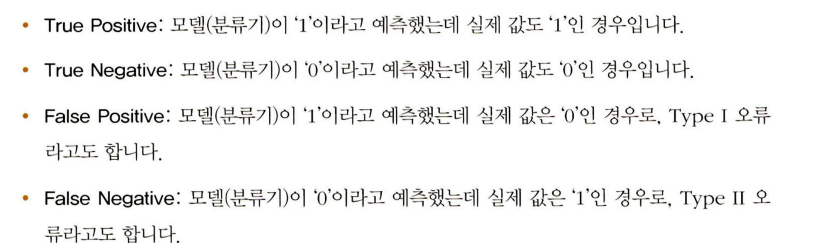
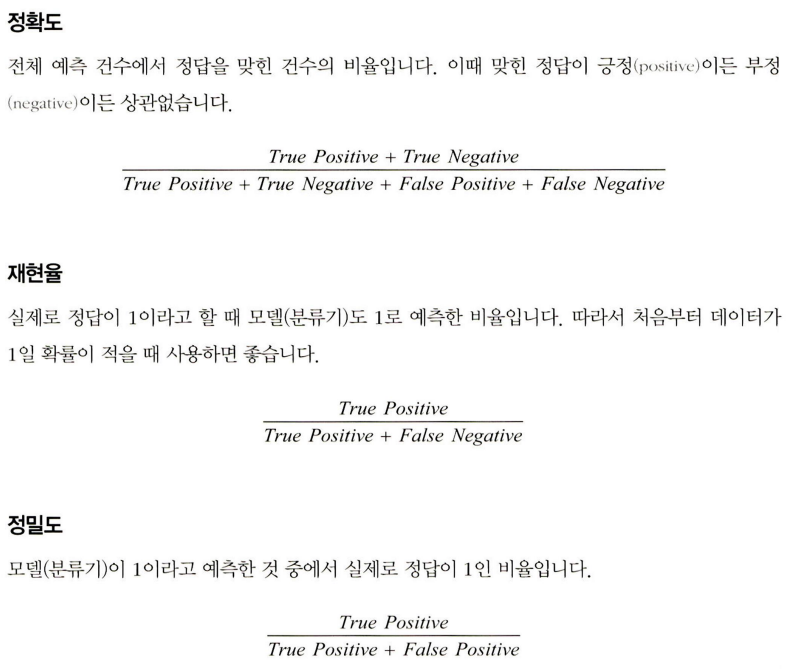
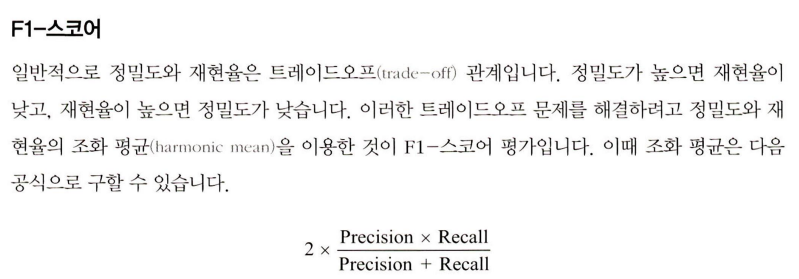